First importing modules

In [29]:
from glycowork.motif.draw import GlycoDraw
from glycowork.motif.processing import canonicalize_iupac
from glycowork.motif.draw import plot_glycans_excel
from glycowork.motif.analysis import get_heatmap
from glycowork.motif.draw import annotate_figure
from glycowork.motif.analysis import get_differential_expression
from glycowork.motif.analysis import get_pca
from glycowork.motif.analysis import get_volcano
from glycowork.motif.annotate import quantify_motifs
from glycowork.network.biosynthesis import *
import pandas as pd

In [30]:
pwd()

'C:\\Users\\xerhma\\Glycans\\lmpc-infection-rnaseq'

Loading input data

In [31]:
df_canonicalized_mouse_all = pd.read_csv(".\\Python_input_files\\df_canonicalized_mouse_all.tsv", sep='\t', dtype={'Glycan_ID': str})
df_canonicalized_mouse_minimal_glycan_col_all = pd.read_csv(".\\Python_input_files\\df_canonicalized_mouse_minimal_glycan_col_all.tsv", sep='\t')
df_canonicalized_mouse_minimal_glycan_col_all.set_index(df_canonicalized_mouse_minimal_glycan_col_all.columns[0], inplace=True)
df_canonicalized_mouse_minimal_sample_col_all = pd.read_csv(".\\Python_input_files\\df_canonicalized_mouse_minimal_sample_col_all.tsv", sep='\t')
#df_canonicalized_mouse_minimal_sample_col_all.set_index(df_canonicalized_mouse_minimal_sample_col_all.columns[0], inplace=True)
mouse_sample_metadata_all = pd.read_csv(".\\Python_input_files\\mouse_sample_metadata_all.tsv", sep='\t')
#mouse_infected_vehicle_sample_names = pd.read_csv(".\\Python_input_files\\mouse_infected_vehicle_sample_names.tsv", sep='\t')
#mouse_infected_vehicle_sample_names = mouse_infected_vehicle_sample_names.iloc[:, 0].tolist()
#mouse_uninfected_vehicle_sample_names = pd.read_csv(".\\Python_input_files\\mouse_uninfected_vehicle_sample_names.tsv", sep='\t')
#mouse_uninfected_vehicle_sample_names = mouse_uninfected_vehicle_sample_names.iloc[:, 0].tolist()

In [32]:
# Lists of group ids
group_sham_infected_ids = mouse_sample_metadata_all[mouse_sample_metadata_all['Group'] == 'ShamInfected']['id'].tolist()
group_hpylori_infected_ids = mouse_sample_metadata_all[mouse_sample_metadata_all['Group'] == 'HpyloriInfected']['id'].tolist()
cohort_G1_ids = mouse_sample_metadata_all[mouse_sample_metadata_all['Cohort'] == 'G1']['id'].tolist()
cohort_G2_ids = mouse_sample_metadata_all[mouse_sample_metadata_all['Cohort'] == 'G2']['id'].tolist()

Drawing SNFG figures

In [33]:
# Function to apply GlycoDraw to each mouse glycan structure string and save the resulting file as pdf
def draw_glycan_mouse(row):
    structure = row['Canonicalized_Structure']
    glycan_id = row['Glycan_ID']
    # Define the output file path
    output_file = f".\\Python_output_files\\Glycan_SNFG\\{glycan_id}_{structure}.pdf"
    # Draw the glycan structure
    GlycoDraw(structure, filepath=output_file)

In [34]:
# Apply the function to each row in the DataFrame for mouse glycans
# All samples
df_canonicalized_mouse_all.apply(draw_glycan_mouse, axis=1)

0     None
1     None
2     None
3     None
4     None
      ... 
95    None
96    None
97    None
98    None
99    None
Length: 100, dtype: object

In [35]:
# Mouse glycans excel with SNFG column
# All samples
plot_glycans_excel(df = df_canonicalized_mouse_all,
                  folder_filepath = ".\\Python_output_files\\Tables",
                  glycan_col_num = 2)

Glycan exploration, for example heatmaps and PCA

In [36]:
print(df_canonicalized_mouse_minimal_sample_col_all)

                                               glycan      G1-1      G1-2  \
0                                     Gal(b1-3)GalNAc  0.242959  0.208267   
1                                   GalOS(b1-3)GalNAc  0.007172  0.012267   
2                          Gal(b1-3)[Fuc(a1-?)]GalNAc  0.140820  0.183320   
3                            Fuc(a1-2)Gal(b1-3)GalNAc  1.811925  1.782675   
4                       Fuc(a1-?)[HexNAc(?1-?)]GalNAc  0.098392  0.079560   
..                                                ...       ...       ...   
95  Neu5Ac(a2-?)Gal(?1-?)GlcNAc(b1-3)Gal(b1-4)GlcN...  0.137300  0.125417   
96  Neu5Ac(a2-?)HexNAc(?1-?)GlcNAc(b1-2)Man(a1-3)[...  0.510790  0.000000   
97  Neu5Ac(a2-?)Gal(?1-?)GlcNAc(b1-2)Man(a1-3)[Neu...  0.005985  0.019840   
98  Neu5Ac(a2-?)Gal(?1-?)GlcNAc(b1-3)Gal(?1-?)GlcN...  0.218813  0.000000   
99  Fuc(a1-2)Gal(?1-?)GlcNAc(b1-3)Gal(?1-?)GlcNAc(...  0.005644  0.024738   

        G1-3      G1-4      G1-5      G1-6      G1-7      G1-8      G2-1  \

In [37]:
print(mouse_sample_metadata_all)

      id            Group Cohort
0   G1-1     ShamInfected     G1
1   G1-2     ShamInfected     G1
2   G1-3     ShamInfected     G1
3   G1-4     ShamInfected     G1
4   G1-5  HpyloriInfected     G1
5   G1-6  HpyloriInfected     G1
6   G1-7  HpyloriInfected     G1
7   G1-8  HpyloriInfected     G1
8   G2-1     ShamInfected     G2
9   G2-2     ShamInfected     G2
10  G2-3     ShamInfected     G2
11  G2-4     ShamInfected     G2
12  G2-5  HpyloriInfected     G2
13  G2-6  HpyloriInfected     G2
14  G2-7  HpyloriInfected     G2
15  G2-8  HpyloriInfected     G2


In [38]:
group_list = mouse_sample_metadata_all['Group'].tolist()

In [39]:
print(group_list)

['ShamInfected', 'ShamInfected', 'ShamInfected', 'ShamInfected', 'HpyloriInfected', 'HpyloriInfected', 'HpyloriInfected', 'HpyloriInfected', 'ShamInfected', 'ShamInfected', 'ShamInfected', 'ShamInfected', 'HpyloriInfected', 'HpyloriInfected', 'HpyloriInfected', 'HpyloriInfected']


In [40]:
cohort_list = mouse_sample_metadata_all['Cohort'].tolist()

In [41]:
print(cohort_list)

['G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2']


In [42]:
## Mouse PCA
# With groups and cohorts
# Doing this in R instead so that I can combine with k means clustering
#get_pca(df = df_canonicalized_mouse_minimal_sample_col_all,
#       motifs = True,
#        groups = mouse_sample_metadata_all,
#        color = 'Group',
#        shape = 'Cohort',
#       feature_set = ['terminal1',
#                      'terminal2',
#                      'terminal3'],
#       filepath = '.\\Python_output_files\\Figures\\PCA_Glycans_Groups_And_Cohorts.pdf')

In [43]:
# Exporting terminal motifs to R
quantified_terminal_motifs = quantify_motifs(df = df_canonicalized_mouse_minimal_sample_col_all.iloc[:, 1:], 
                glycans = df_canonicalized_mouse_minimal_sample_col_all.iloc[:, 0].values.tolist(), 
                feature_set = ['terminal1',
                               'terminal2',
                               'terminal3'])

quantified_terminal_motifs.to_excel('.\\Python_output_files\\Tables\\quantified_terminal_motifs.xlsx', 
                                    index=True,
                                   index_label = 'Terminal_Motif')

In [44]:
# Prepare annotation to be passed to seaborn.
df_heatmap_annotation = mouse_sample_metadata_all.set_index('id')

In [45]:
group_to_color = {
    'ShamInfected': '#4DC36B', # Green
    'HpyloriInfected': '#440C55', # Purple
}

cohort_to_color = {
    'G1': '#E85311', # Orange
    'G2': '#15B8E9', # Blue
}

In [46]:
col_colors = pd.DataFrame({
    'Group': df_heatmap_annotation['Group'].map(group_to_color),
    'Cohort': df_heatmap_annotation['Cohort'].map(cohort_to_color)
})

In [47]:
kwargs = {
    'col_colors': col_colors
}

In [48]:
# Perform Heatmap
# Glycan level
# svg
get_heatmap(df_canonicalized_mouse_minimal_glycan_col_all, 
            motifs=False, 
            transform='', 
            datatype='response', 
            rarity_filter=0.05, 
            filepath='.\\Python_output_files\\Figures\\Heatmap_ID_Glycans.svg', 
            return_plot=False,
            yticklabels = 1,
            xticklabels = 1,
            figsize=(24,128),
            **kwargs)

# pdf
get_heatmap(df_canonicalized_mouse_minimal_glycan_col_all, 
            motifs=False, 
            transform='', 
            datatype='response', 
            rarity_filter=0.05, 
            filepath='.\\Python_output_files\\Figures\\Heatmap_ID_Glycans.pdf', 
            return_plot=False,
            yticklabels = 1,
            xticklabels = 1,
            figsize=(24,128),
            **kwargs)

In [49]:
# Annotate heatmap with SNFG figures
annotate_figure(svg_input = ".\\Python_output_files\\Figures\\Heatmap_ID_Glycans.svg",
                glycan_size = 'small',
                filepath = ".\\Python_output_files\\Figures\\Heatmap_Glycans_ID_Annotated.pdf",
                compact = False)

In [50]:
# Perform Heatmap
# Terminal motif level
# svg
get_heatmap(df_canonicalized_mouse_minimal_glycan_col_all, 
            motifs=True, 
            feature_set=['terminal1',
                         'terminal2',
                         'terminal3'], 
            transform='', 
            datatype='response', 
            rarity_filter=0.05, 
            filepath='.\\Python_output_files\\Figures\\Heatmap_Motifs_Glycans.svg', 
            return_plot=False,
            yticklabels = 1,
            xticklabels = 1,
            figsize=(12,32),
            **kwargs)

# pdf
get_heatmap(df_canonicalized_mouse_minimal_glycan_col_all, 
            motifs=True, 
            feature_set=['terminal1',
                         'terminal2',
                         'terminal3'], 
            transform='', 
            datatype='response', 
            rarity_filter=0.05, 
            filepath='.\\Python_output_files\\Figures\\Heatmap_Motifs_Glycans.pdf', 
            return_plot=False,
            yticklabels = 1,
            xticklabels = 1,
            figsize=(12,32),
            **kwargs)

In [51]:
# Annotate heatmap with SNFG figures
annotate_figure(svg_input = ".\\Python_output_files\\Figures\\Heatmap_Motifs_Glycans.svg",
                glycan_size = 'small',
                filepath = ".\\Python_output_files\\Figures\\Heatmap_Glycans_Motifs_Annotated.pdf",
                compact = False)

In [52]:
# Differential glycomics on motif level
# Treatment comparison
differential_glycomics_treatment_df = get_differential_expression(df = df_canonicalized_mouse_minimal_sample_col_all,
                                                                     group1 = group_sham_infected_ids,
                                                                     group2 = group_hpylori_infected_ids,
                                                                     motifs = True,
                                                                     feature_set = ['terminal1', 
                                                                                    'terminal2',
                                                                                    'terminal3'],
                                                                     paired = False,
                                                                     min_samples = 0.1)
print(differential_glycomics_treatment_df)

You're working with an alpha of 0.05835541289349022 that has been adjusted for your sample size of 16.
                                     Glycan  Mean abundance    Log2FC  \
21                 Terminal_Fuc(a1-6)GlcNAc        0.068636  0.389011   
82                       Terminal_Gal(b1-4)        1.549612 -0.046681   
9    Terminal_Gal(b1-3)[Neu5Ac(a2-6)]GalNAc        0.032732 -0.096146   
78     Terminal_Gal(b1-4)GlcNAc(b1-6)GalNAc        1.142567 -0.049470   
25   Terminal_GalNAc(b1-?)[Fuc(a1-?)]GlcNAc        0.054033  0.314294   
..                                      ...             ...       ...   
32           Terminal_Man(a1-2)Man(a1-2)Man        0.185662  0.229420   
73                    Terminal_GlcNAc(b1-?)        0.886476 -0.102256   
33  Terminal_HexNAc(?1-?)GlcNAc(b1-?)GalNAc        0.091780 -0.196738   
63     Terminal_GlcNAc(a1-?)Gal(?1-?)GlcNAc        0.927168 -0.008068   
14            Terminal_GlcNAcOS(b1-6)GalNAc        0.036894  0.004080   

       p-val  corr p

In [53]:
# Differential glycomics on motif level
# Cohort
differential_glycomics_cohort_df = get_differential_expression(df = df_canonicalized_mouse_minimal_sample_col_all,
                                                                     group1 = cohort_G1_ids,
                                                                     group2 = cohort_G2_ids,
                                                                     motifs = True,
                                                                     feature_set = ['terminal1', 
                                                                                    'terminal2',
                                                                                    'terminal3'],
                                                                     paired = False,
                                                                     min_samples = 0.1)
print(differential_glycomics_cohort_df)

You're working with an alpha of 0.05835541289349022 that has been adjusted for your sample size of 16.
                                    Glycan  Mean abundance    Log2FC  \
90             Terminal_Fuc(a1-2)Gal(b1-3)        2.443509 -0.510013   
18       Terminal_Gal(?1-?)GlcNAc(b1-?)Man        0.043583 -0.685319   
89       Terminal_Fuc(a1-2)Gal(b1-3)GalNAc        2.274170 -0.464737   
93             Terminal_Fuc(a1-?)Gal(b1-?)       10.566399 -0.569208   
94                      Terminal_Fuc(a1-2)       12.026148 -0.569207   
..                                     ...             ...       ...   
0     Terminal_GlcNAc(b1-4)Man(b1-4)GlcNAc        0.016313  0.789904   
63    Terminal_GlcNAc(a1-?)Gal(?1-?)GlcNAc        0.929912 -0.181670   
2   Terminal_Gal(b1-3)[Neu5Gc(a2-6)]GalNAc        0.003679  0.118649   
16  Terminal_Neu5Ac(a2-3)[GalNAc(b1-4)]Gal        0.041156 -0.033243   
69                   Terminal_Neu5Ac(a2-?)        1.191585  0.004296   

       p-val  corr p-val  signif

In [54]:
differential_glycomics_treatment_df.to_excel('.\\Python_output_files\\Tables\\differential_glycomics_treatment.xlsx', index=False)
differential_glycomics_cohort_df.to_excel('.\\Python_output_files\\Tables\\differential_glycomics_cohort.xlsx', index=False)

You're working with a default alpha of 0.05. Set sample size (n = ...) for Bayesian-Adaptive Alpha Adjustment


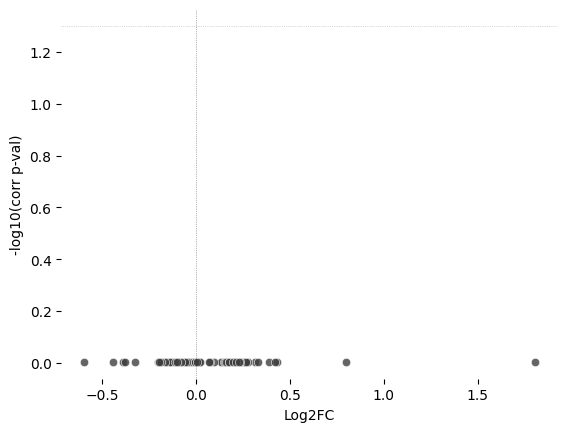

You're working with a default alpha of 0.05. Set sample size (n = ...) for Bayesian-Adaptive Alpha Adjustment


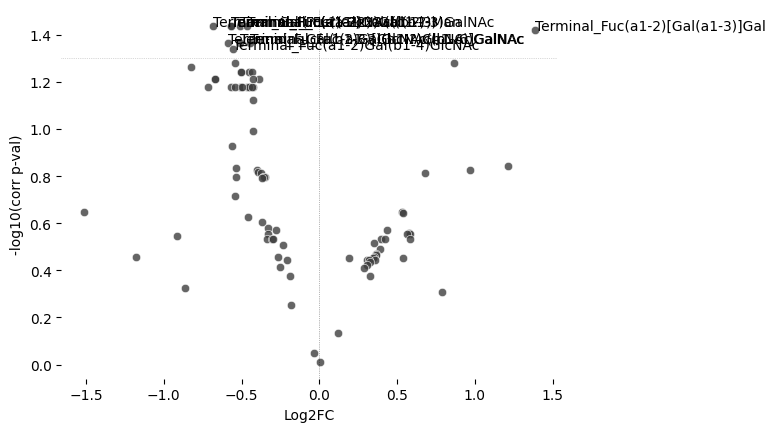

In [55]:
# Differential glycomics volcano plot
get_volcano(differential_glycomics_treatment_df,
           annotate_volcano = True,
           filepath = '.\\Python_output_files\\Figures\\differential_glycomics_treatment_volcano.svg')
# Differential glycomics volcano plot
get_volcano(differential_glycomics_cohort_df,
           annotate_volcano = True,
           filepath = '.\\Python_output_files\\Figures\\differential_glycomics_cohort_volcano.svg')

In [56]:
annotate_figure(svg_input = ".\\Python_output_files\\Figures\\differential_glycomics_treatment_volcano.svg",
                glycan_size = 'small',
                filepath = ".\\Python_output_files\\Figures\\differential_glycomics_treatment_volcano_Annotated.pdf",
                compact = False)

annotate_figure(svg_input = ".\\Python_output_files\\Figures\\differential_glycomics_cohort_volcano.svg",
                glycan_size = 'small',
                filepath = ".\\Python_output_files\\Figures\\differential_glycomics_cohort_volcano_Annotated.pdf",
                compact = False)